# Deep Learning Project - Handwritten Digit Recognition using Python

Handwritten Digit Recognition is the ability of computers to recognize human handwritten digits. It is easy for humans to recognize handwritten digits but a hard task for computers since the digit can be made in different flavours. In this notebook a recogniton model would be built with MNIST dataset.

### 1. Import the libraries and load dataset

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [15]:
#load train and test dataset
def load_dataset():
    #load mnist dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    #reshape the dataset to have a single channel
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    #turn target values to a binary class matrices
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

### 2. Preprocess the data

In [16]:
#scale pixels and change data type
def prep_pixels(train, test):
    #convert from integers to floats
    x_train = train.astype('float32')
    x_test = test.astype('float32')
    #normalize train and test data to range 0-1
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    return x_train, x_test

### 3. Create model
Now we will create a CNN Model. A CNN Model usually consists of convoluational and pooling layers, followed by dropout and fully connected layers. The dropout layers are used to deactive some of the neurons to aviod over fitting. We will then compile the modle with the Adam optimizer.

In [32]:
#define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    
    return model

### 4. Evaluate model

In [33]:
def evaluate_model(x_train, y_train, x_test, y_test):
    model = define_model()
    history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_data = (x_test, y_test))
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    return acc, val_acc, loss, val_loss

In [34]:
#plot learning curve
def summarize_plot(acc, val_acc, loss, val_loss):
    plt.figure(figsize = (8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label = 'Training Accuracy')
    plt.plot(val_acc, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.ylim([min(plt.ylim()), 1])
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label = 'Training Loss')
    plt.plot(val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')
    plt.ylabel('Cross Entropy')
    plt.title('Training and Validation Loss')
    plt.ylim([0, max(plt.ylim())])
    plt.xlabel('epochs')
    
    plt.show()

In [35]:
def run():
    x_train, x_test, y_train, y_test = load_dataset()
    x_train, x_test = prep_pixels(x_train, x_test)
    acc, val_acc, loss, val_loss = evaluate_model(x_train, y_train, x_test, y_test)
    summarize_plot(acc, val_acc, loss, val_loss)

Epoch 1/20
469/469 [==============================] - 249s 530ms/step - loss: 0.1648 - accuracy: 0.9505 - val_loss: 0.0440 - val_accuracy: 0.9865
Epoch 2/20
469/469 [==============================] - 226s 482ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 3/20
469/469 [==============================] - 248s 529ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0315 - val_accuracy: 0.9897
Epoch 4/20
469/469 [==============================] - 213s 453ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0333 - val_accuracy: 0.9897
Epoch 5/20
469/469 [==============================] - 190s 405ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 6/20
469/469 [==============================] - 214s 456ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0339 - val_accuracy: 0.9892
Epoch 7/20
469/469 [==============================] - 206s 439ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0372 -

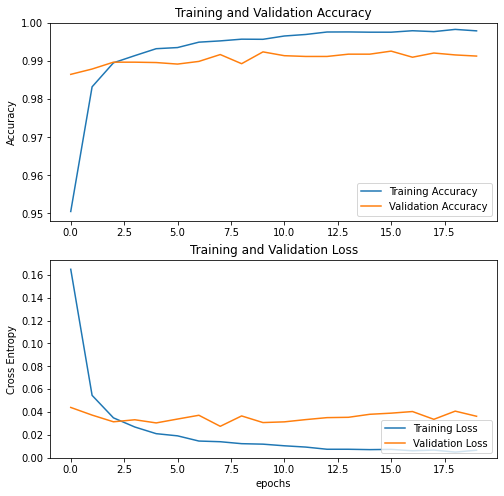

In [36]:
run()